In [97]:
#Load needed python routines

from matplotlib import pyplot as plt
import xrayutilities as xu
from scipy import misc
import os
import numpy as np
import pandas as pd
import peakutils
from matplotlib import rcParams
from matplotlib import patches
import sys

In [98]:
#Load 4-id-c functions 
from s4idc_funcs_v2 import *

In [99]:
#Set Fonts/Plot Style

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams.update({'font.size': 18})
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

In [100]:
#Choose data file
specpath = "./data/"
specfile = "SSFeb21_mca.mca"

# Get the spec file
sf = specFile(specpath+specfile)
df = get_specScan(sf, 237)  #use file number
df.columns

Index(['SGM1:Energy', 'Sum_reflectivity', 'XMCD_reflectivity', 'Sum_TEY',
       'XMCD_TEY', 'Sum_FY', 'XMCD_FY', 'reference', 'ID04b:set_energy.VAL',
       'i0_A', 'TEY_A', '0', 'REF_A', 'i0_B', 'TEY_B', '01', 'REF_B',
       'XMCD_Sum', 'XMCD_Sum1', 'XMCD_Sum2', 'XMCD_TEY1', 'XMCD_TFY',
       'XMCD_REF', '4idc1:scaler1_calc6.VAL', '4idc1:scaler1.S7',
       'Magnet_Field', '4idc1:scaler2.S8', 'Data_anal', 'Data_anal1',
       'XMCD_Sum3', 'XMCD_Sum4', 'XMCD_TFY1', 'TEYN_1', 'TEYN_2', 'XMCD_TEY2',
       'REFN_1', 'REFN_2', 'XMCD_REF1', 'XMCD_Sum5', 'XMCD_Sum6', 'XMCD_Sum7',
       'i/o_fix', 'RFM_Focus', '4idc1:scaler1.S10',
       'Format_string_for_Ctl_query', 'Index'],
      dtype='object')

In [101]:
#field dependent measurement from 2, 0.1 for binary alloys
#field =  np.array([0.1,2])  
#Erscan_pT = np.array([382,384])  
#Erscan_nT = np.array([385,386])  
#Prscan_pT = np.array([394,399])  
#Prscan_nT = np.array([400,401])


#field dependent measurement from 5, 1, and 0.5 for sample 4(100)
#field =  np.array([5,1,0.5])  
#Erscan_pT = np.arange(114,120,2)
#Erscan_nT = np.arange(120,126,2)

#Prscan_pT = np.arange(115,120,2)
#Prscan_nT = np.arange(121,127,2)

#field dependent measurement from 0 to 5 T and 0 to -5 T for sample 4(110)

field =  np.array([0,1,2,2.5,3,4]) 
Erscan_pT = np.array([157,161,165,167,169,173]) 
Erscan_nT = np.arange(237,249,2)

Prscan_pT = np.array([158,162,166,168,170,174]) 
Prscan_nT = np.arange(238,250,2)


Erdata_pT = []
Erdata_nT = []

Prdata_pT = []
Prdata_nT = []

for i in range(len(field)):
    Erdata_pT.append(XMCD(sf,Erscan_pT[i]))
    Erdata_nT.append(XMCD(sf,Erscan_nT[i]))
    
    Prdata_pT.append(XMCD(sf,Prscan_pT[i]))
    Prdata_nT.append(XMCD(sf,Prscan_nT[i]))
    
Erdata_pT = np.array(Erdata_pT)
Erdata_nT= np.array(Erdata_nT)

Prdata_pT = np.array(Prdata_pT)
Prdata_nT= np.array(Prdata_nT)



In [102]:
energy_pT_Er = Erdata_pT[:,0,:]
tey_sum_pT_Er = Erdata_pT[:,3,:]
xmcd_tey_pT_Er = Erdata_pT[:,4,:]

energy_pT_Pr = Prdata_pT[:,0,:]
tey_sum_pT_Pr = Prdata_pT[:,3,:]
xmcd_tey_pT_Pr = Prdata_pT[:,4,:]

energy_nT_Er= Erdata_nT[:,0,:]
tey_sum_nT_Er= Erdata_nT[:,3,:]
xmcd_tey_nT_Er= Erdata_nT[:,4,:]

energy_nT_Pr= Prdata_nT[:,0,:]
tey_sum_nT_Pr= Prdata_nT[:,3,:]
xmcd_tey_nT_Pr= Prdata_nT[:,4,:]


Text(0.5, 1.0, 'Er XMCD')

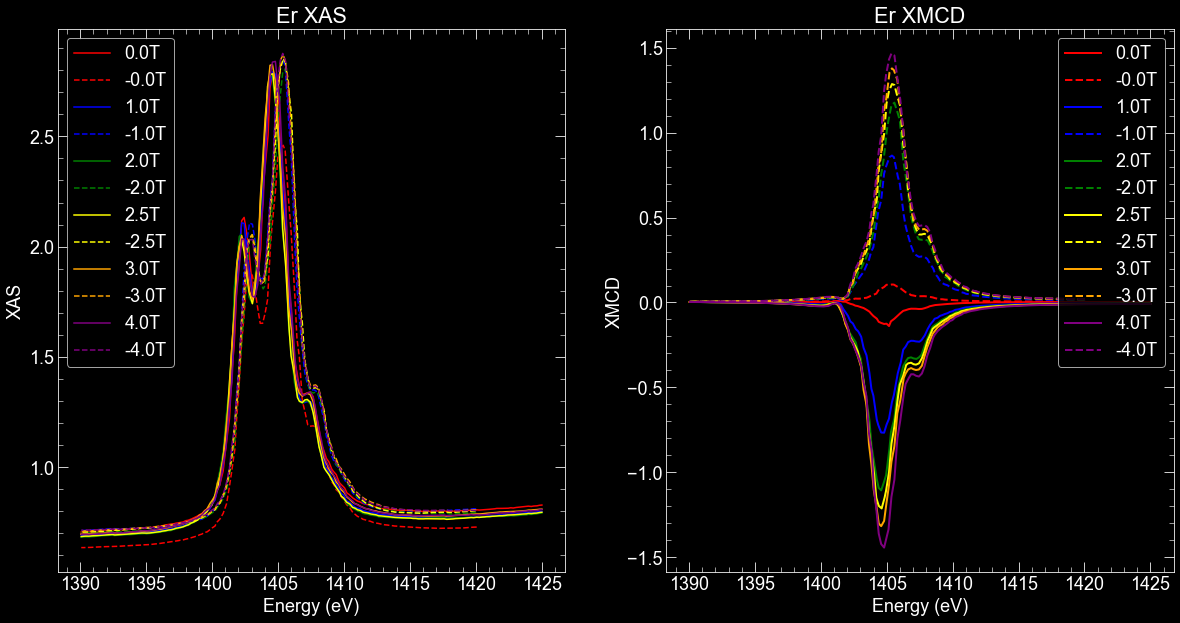

In [103]:
#Look at backgrounds and subtracted data ER
col = ["red", "blue" , "green", 'yellow', 'orange', 'purple', 'cyan', 'white', 'gray', 'navy', 'pink', 'olive', 'orchid', 'sienna']
colors=[]
for i in range(len(field)):
    colors.append(col[i])

plt.style.use('dark_background')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
#ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
ax1.set_title('Er XAS')
for i in range(len(field)):
    ax1.plot(energy_pT_Er[i,:],tey_sum_pT_Er[i,:],color=colors[i],label=str(field[i])+'T')
    ax1.plot(energy_nT_Er[i,:],tey_sum_nT_Er[i,:],color=colors[i],linestyle='--',label='-'+str(field[i])+'T')
    
#ax1.set_ylim(0.2,2)
ax1.legend(loc=2)

ax2.set_ylabel('XMCD')
ax2.set_xlabel('Energy (eV)')
#ax2.tick_params(axis='both',direction='in',length=10,which='both')
for i in range(len(field)):
    ax2.plot(energy_pT_Er[i,:],xmcd_tey_pT_Er[i,:],lw=2,color=colors[i],label=str(field[i])+'T')
    ax2.plot(energy_nT_Er[i,:],xmcd_tey_nT_Er[i,:],lw=2,color=colors[i],linestyle='--',label='-'+str(field[i])+'T')
ax2.legend(loc=0)
ax2.set_title('Er XMCD')


Text(0.5, 1.0, 'Pr XMCD')

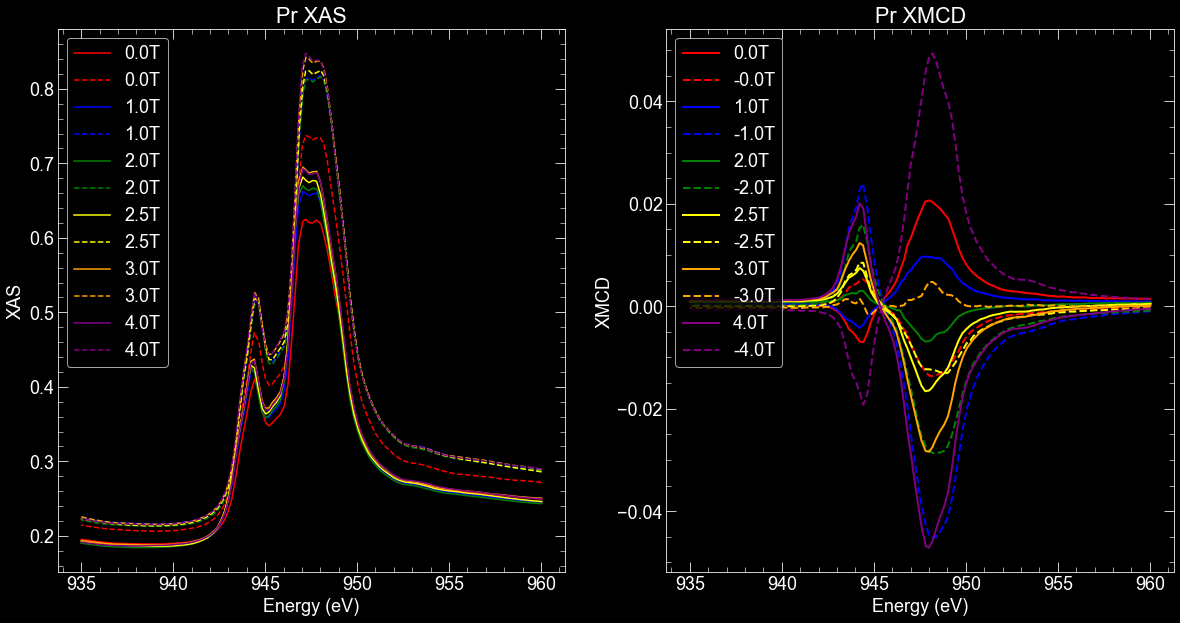

In [104]:

plt.style.use('dark_background')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
#ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
ax1.set_title('Pr XAS')
for i in range(len(field)):
    ax1.plot(energy_pT_Pr[i,:],tey_sum_pT_Pr[i,:],color=colors[i],label=str(field[i])+'T')
    ax1.plot(energy_nT_Pr[i,:],tey_sum_nT_Pr[i,:],color=colors[i],linestyle='--',label=str(field[i])+'T')
    
#ax1.set_ylim(0.2,2)
ax1.legend(loc=2)

ax2.set_ylabel('XMCD')
ax2.set_xlabel('Energy (eV)')
#ax2.tick_params(axis='both',direction='in',length=10,which='both')
for i in range(len(field)):
    ax2.plot(energy_pT_Pr[i,:],xmcd_tey_pT_Pr[i,:],lw=2,color=colors[i],label=str(field[i])+'T')
    ax2.plot(energy_nT_Pr[i,:],xmcd_tey_nT_Pr[i,:],lw=2,color=colors[i],linestyle='--',label='-'+str(field[i])+'T')
ax2.legend(loc=2)
ax2.set_title('Pr XMCD')

In [105]:

#Fix energy shifts
peak_pos_Er_pT= []
peak_pos_Er_nT= []
peak_pos_Pr_pT= []
peak_pos_Pr_nT= []
for i in range(len(field)):
    peak_Er_pT = np.where(tey_sum_pT_Er[i,:]==np.nanmax(tey_sum_pT_Er[i,:]))
    peak_Er_nT = np.where(tey_sum_nT_Er[i,:]==np.nanmax(tey_sum_nT_Er[i,:]))
    peak_Pr_pT = np.where(tey_sum_pT_Pr[i,:]==np.nanmax(tey_sum_pT_Pr[i,:]))
    peak_Pr_nT = np.where(tey_sum_nT_Pr[i,:]==np.nanmax(tey_sum_nT_Pr[i,:]))

    peak_pos_Er_pT.append(peak_Er_pT)
    peak_pos_Er_nT.append(peak_Er_nT)
    peak_pos_Pr_pT.append(peak_Pr_pT)
    peak_pos_Pr_nT.append(peak_Pr_nT)

dif_Eng_Er= []
dif_Eng_Pr= []
for i in range(len(field)):     
    dif_Er = energy_pT_Er[i,:][peak_pos_Er_pT[i]] - energy_nT_Er[i,:][peak_pos_Er_nT[i]]
    dif_Pr = energy_pT_Pr[i,:][peak_pos_Pr_pT[i]] - energy_nT_Pr[i,:][peak_pos_Pr_nT[i]]
    dif_Eng_Er.append(dif_Er)
    dif_Eng_Pr.append(dif_Pr)
    
for i in range(len(field)): 
    energy_nT_Er[i,:] += dif_Eng_Er[i]
    energy_nT_Pr[i,:] += dif_Eng_Pr[i]

In [106]:
sctey_pT_Er= np.zeros(tey_sum_pT_Er.shape)
scxmcd_tey_pT_Er= np.zeros(tey_sum_pT_Er.shape)

sctey_pT_Pr= np.zeros(tey_sum_pT_Pr.shape)
scxmcd_tey_pT_Pr= np.zeros(tey_sum_pT_Pr.shape)

for i in range(len(field)):
    sctey_pT_Er[i,:], scxmcd_tey_pT_Er[i,:] = norm_xmcd(tey_sum_pT_Er[i,:], xmcd_tey_pT_Er[i,:])
    sctey_pT_Pr[i,:], scxmcd_tey_pT_Pr[i,:] = norm_xmcd(tey_sum_pT_Pr[i,:], xmcd_tey_pT_Pr[i,:])


    
sctey_nT_Er = np.zeros(tey_sum_nT_Er.shape)
scxmcd_tey_nT_Er = np.zeros(tey_sum_nT_Er.shape)

sctey_nT_Pr = np.zeros(tey_sum_nT_Pr.shape)
scxmcd_tey_nT_Pr = np.zeros(tey_sum_nT_Pr.shape)

for i in range(len(field)):
    sctey_nT_Er[i,:], scxmcd_tey_nT_Er[i,:] = norm_xmcd(tey_sum_nT_Er[i,:], xmcd_tey_nT_Er[i,:])
    sctey_nT_Pr[i,:], scxmcd_tey_nT_Pr[i,:] = norm_xmcd(tey_sum_nT_Pr[i,:], xmcd_tey_nT_Pr[i,:])
    
#Correct XMCD zero

for i in range(len(field)):
    scxmcd_tey_pT_Er[i,:] -=  np.average(scxmcd_tey_pT_Er[i,-5:-1])
    scxmcd_tey_nT_Er[i,:] -=  np.average(scxmcd_tey_nT_Er[i,-5:-1])
    
    scxmcd_tey_pT_Pr[i,:] -=  np.average(scxmcd_tey_pT_Pr[i,-5:-1])
    scxmcd_tey_nT_Pr[i,:] -=  np.average(scxmcd_tey_nT_Pr[i,-5:-1])

Normalization:  2.0730448144089997
Normalization:  0.43571731084000004
Normalization:  2.10169544282
Normalization:  0.4767502031
Normalization:  2.097357980562
Normalization:  0.485795102786
Normalization:  2.097969554509
Normalization:  0.49556646106299995
Normalization:  2.129075727204
Normalization:  0.507221202237
Normalization:  2.144380200072
Normalization:  0.5062084787419999
Normalization:  1.8241894226
Normalization:  0.531297819105
Normalization:  2.128266603847
Normalization:  0.602225794085
Normalization:  2.1015662043459997
Normalization:  0.603457255793
Normalization:  2.146957394561
Normalization:  0.611014660202
Normalization:  2.1599600212579997
Normalization:  0.6268557732819999
Normalization:  2.1619823576890003
Normalization:  0.632757326906


Text(0.5, 1.0, 'Er XMCD')

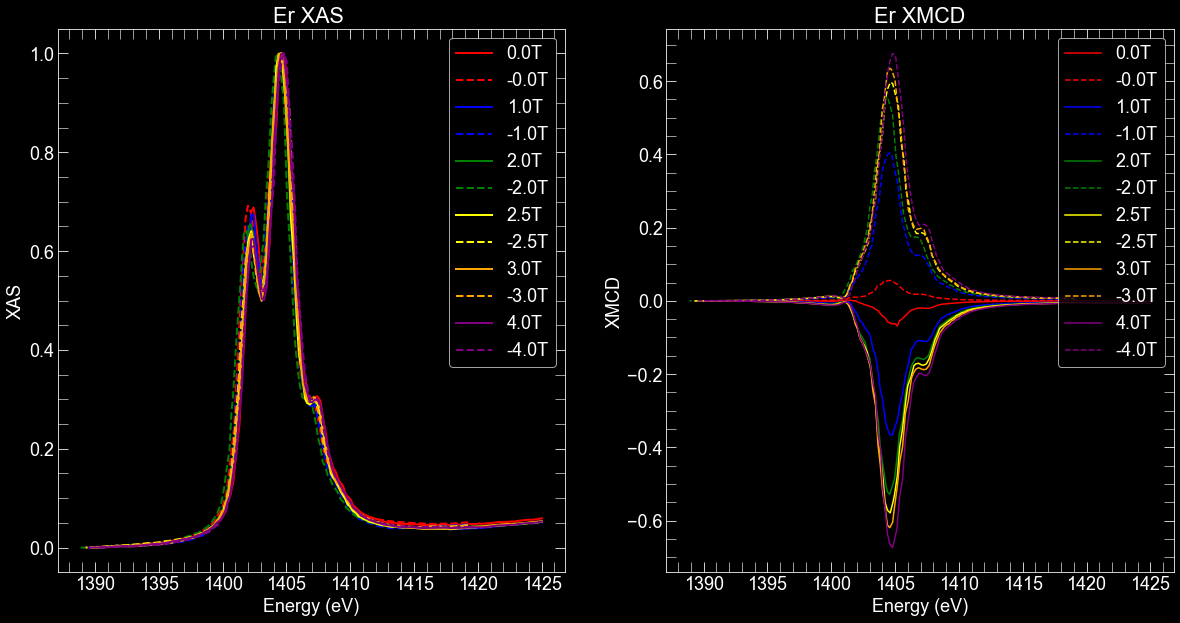

In [107]:
#Look at backgrounds and subtracted data Er
plt.style.use('dark_background')
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
for i in range(len(field)):
    ax1.plot(energy_pT_Er[i,:],sctey_pT_Er[i,:],linewidth=2, color=colors[i],label=str(field[i])+'T')
    ax1.plot(energy_nT_Er[i,:],sctey_nT_Er[i,:],linewidth=2, linestyle='--', color=colors[i],label='-'+str(field[i])+'T')
ax1.legend()
ax1.set_title('Er XAS ')




ax2.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax2.set_ylabel('XMCD')
ax2.set_xlabel('Energy (eV)')
for i in range(len(field)):
    ax2.plot(energy_pT_Er[i,:],scxmcd_tey_pT_Er[i,:],color=colors[i],label=str(field[i])+'T')
    ax2.plot(energy_nT_Er[i,:],scxmcd_tey_nT_Er[i,:],color=colors[i],linestyle='--',label='-'+str(field[i])+'T')

ax2.legend()
ax2.set_title('Er XMCD')

Text(0.5, 1.0, 'Pr XMCD')

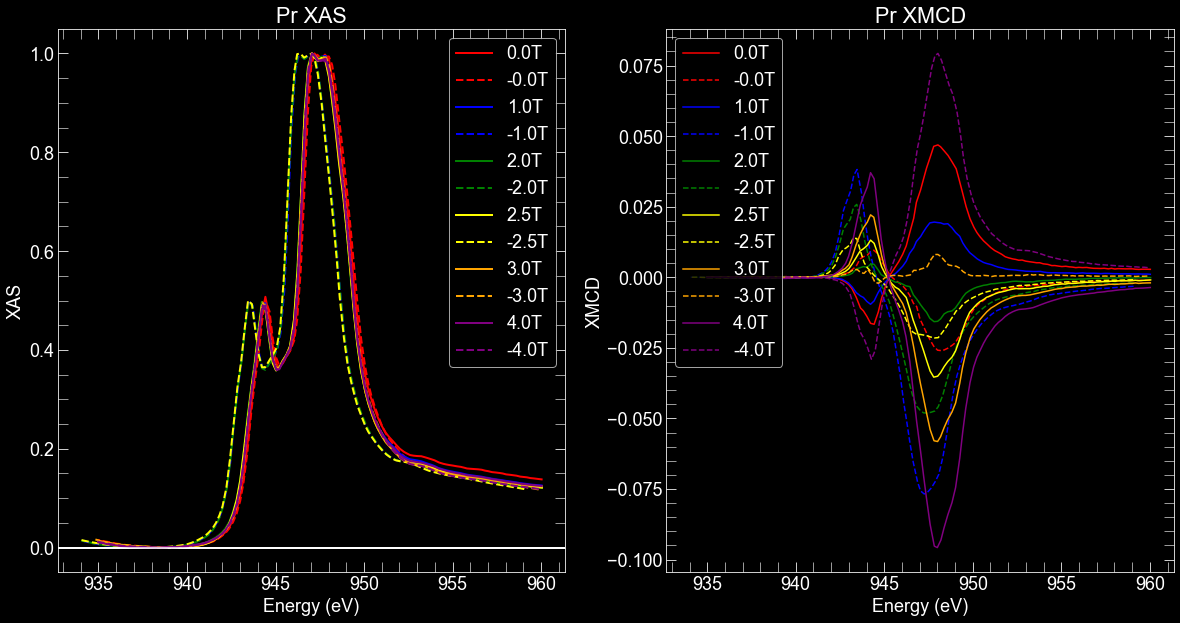

In [108]:

plt.style.use('dark_background')
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax1.set_ylabel('XAS')
ax1.set_xlabel('Energy (eV)')
for i in range(len(field)):
    ax1.plot(energy_pT_Pr[i,:],sctey_pT_Pr[i,:],linewidth=2, color=colors[i],label=str(field[i])+'T')
    ax1.plot(energy_nT_Pr[i,:],sctey_nT_Pr[i,:],linewidth=2, linestyle='--', color=colors[i],label='-'+str(field[i])+'T')
    ax1.axhline(0,color='w')
ax1.legend()
ax1.set_title('Pr XAS')




ax2.tick_params(axis='both',direction='in',length=10,which='both')#,labelright=True,right=True)
ax2.set_ylabel('XMCD')
ax2.set_xlabel('Energy (eV)')
for i in range(len(field)):
    ax2.plot(energy_pT_Pr[i,:],scxmcd_tey_pT_Pr[i,:],color=colors[i],label=str(field[i])+'T')
    ax2.plot(energy_nT_Pr[i,:],scxmcd_tey_nT_Pr[i,:],color=colors[i],linestyle='--',label='-'+str(field[i])+'T')
    

ax2.legend(loc=2)
ax2.set_title('Pr XMCD' )

In [109]:
sctey_sum_Er= np.zeros(sctey_pT_Er.shape)
scxmcd_tey_dif_Er= np.zeros(scxmcd_tey_pT_Er.shape)


sctey_sum_Pr= np.zeros(sctey_pT_Pr.shape)
scxmcd_tey_dif_Pr= np.zeros(scxmcd_tey_pT_Pr.shape)

for i in range(len(field)):
    sctey_sum_Er[i,:]=(sctey_pT_Er[i,:]+np.interp(energy_pT_Er[i,:],energy_nT_Er[i,:],sctey_nT_Er[i,:]))/2
    #sctey_sum_Er[i,:]=(sctey_pT_Er[i,:]+sctey_nT_Er[i,:])/2
    
    scxmcd_tey_dif_Er[i,:] = (scxmcd_tey_pT_Er[i,:] - np.interp(energy_pT_Er[i,:],energy_nT_Er[i,:],scxmcd_tey_nT_Er[i,:]))/2
    #scxmcd_tey_dif_Er[i,:150] = (scxmcd_tey_pT_Er[i,:150] + scxmcd_tey_nT_Er[i,:150])/2
        
    sctey_sum_Pr[i,:]=(sctey_pT_Pr[i,:]-np.interp(energy_pT_Pr[i,:],energy_nT_Pr[i,:],sctey_nT_Pr[i,:]))/2
    #scxmcd_tey_dif_Pr[i,:] = (scxmcd_tey_pT_Pr[i,:] + np.interp(energy_pT_Pr[i,:],energy_nT_Pr[i,:],scxmcd_tey_nT_Pr[i,:]))/2
    
    scxmcd_tey_dif_Pr[i,:] = (scxmcd_tey_pT_Pr[i,:] + scxmcd_tey_nT_Pr[i,:])/2
    #scxmcd_tey_dif +=.0003

In [110]:
np.interp(energy_pT_Er[i,:],energy_nT_Er[i,:],scxmcd_tey_nT_Er[i,:]).shape

(176,)

In [111]:
print(scxmcd_tey_pT_Er.shape)

(6, 176)


Text(0.5, 1.0, 'Pr XMCD Diff')

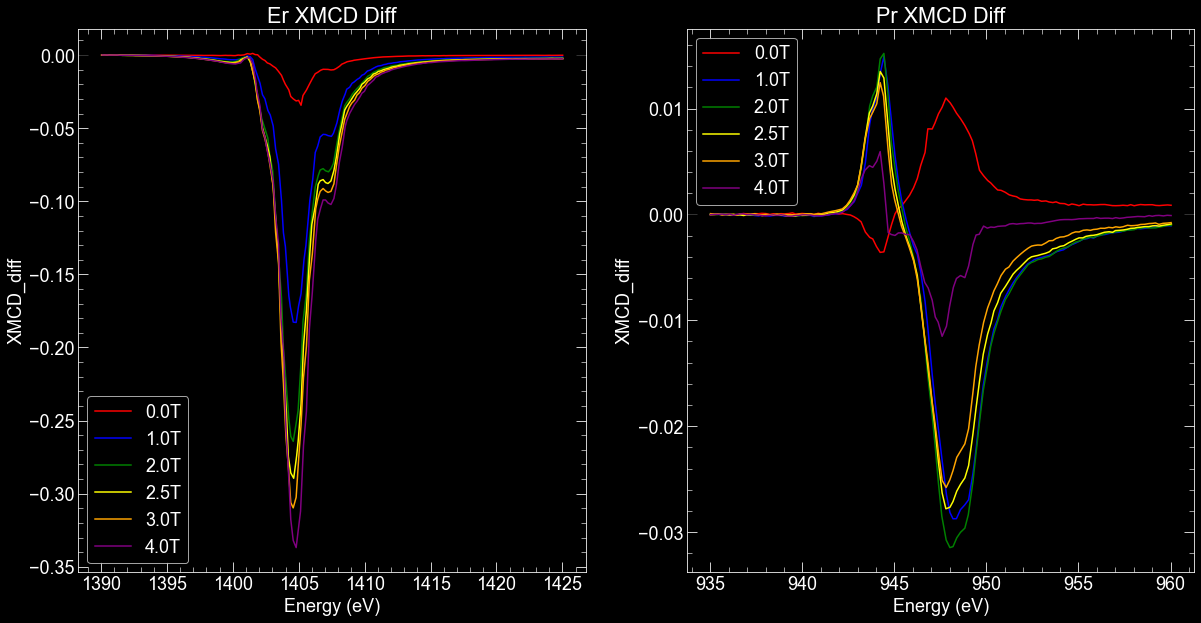

In [112]:
#Look at backgrounds and subtracted data
plt.style.use('dark_background')
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.set_ylabel('XMCD_diff')
ax1.set_xlabel('Energy (eV)')
ax1.axhline(0,color='k')
for i in range(len(field)):
    ax1.plot(energy_pT_Er[i,:],scxmcd_tey_dif_Er[i,:],color=colors[i],label=str(field[i])+'T')
ax1.legend()
ax1.set_title('Er XMCD Diff')

#Look at backgrounds and subtracted data Pr

ax2.set_ylabel('XMCD_diff')
ax2.set_xlabel('Energy (eV)')
ax2.axhline(0,color='k')
for i in range(len(field)):
    ax2.plot(energy_pT_Pr[i,:],scxmcd_tey_dif_Pr[i,:],color=colors[i],label=str(field[i])+'T')
ax2.legend()
ax2.set_title('Pr XMCD Diff')

In [113]:
#Simple XMCD height analysis
Pk_scxmcd_dif_Er= np.zeros(field.shape)
Pk_scxmcd_dif_Pr= np.zeros(field.shape)

for i in range(len(field)):
    if abs(np.nanmax(scxmcd_tey_dif_Er[i,:])) >  abs(np.nanmin(scxmcd_tey_dif_Er[i,:])):
        Pk_scxmcd_dif_Er[i] = np.nanmax(scxmcd_tey_dif_Er[i,:])
    else:
        Pk_scxmcd_dif_Er[i] = np.nanmin(scxmcd_tey_dif_Er[i,:])
                 
for i in range(len(field)):
    if abs(np.nanmax(scxmcd_tey_dif_Pr[i,:]))>abs(np.nanmin(scxmcd_tey_dif_Pr[i,:])):             
        Pk_scxmcd_dif_Pr[i] = np.nanmax(scxmcd_tey_dif_Pr[i,:])
    else:
        Pk_scxmcd_dif_Pr[i] = np.nanmin(scxmcd_tey_dif_Pr[i,:])


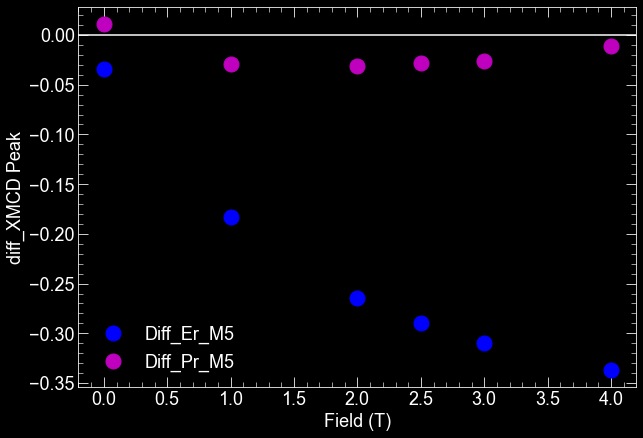

In [114]:
plt.style.use('dark_background')
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_ylabel('diff_XMCD Peak')
ax.set_xlabel('Field (T)')
ax.plot(field,Pk_scxmcd_dif_Er, 'bo', label='Diff_Er_M5', markersize=15);
ax.plot(field,Pk_scxmcd_dif_Pr, 'mo', label='Diff_Pr_M5', markersize=15);
ax.axhline(0,color='w')
ax.legend(frameon=False)

In [56]:
#for all three directions

field_100 = []  
Pk_scxmcd_dif_Er_100=[]
Pk_scxmcd_dif_Pr_100=[]

field_110 = []  
Pk_scxmcd_dif_Er_110=[]
Pk_scxmcd_dif_Pr_110=[]

field_111 = []  
Pk_scxmcd_dif_Er_111=[]
Pk_scxmcd_dif_Pr_111=[]

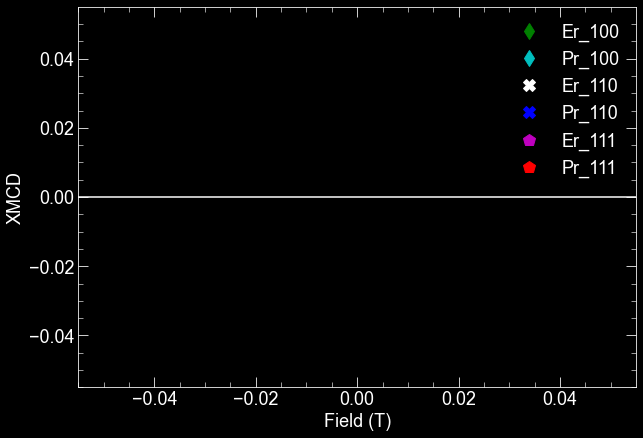

In [57]:
#plot for all three directions
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_ylabel('XMCD')
ax.set_xlabel('Field (T)')
ax.plot(field_100,Pk_scxmcd_dif_Er_100, 'd',label='Er_100',color='g',markersize=12)
ax.plot(field_100,Pk_scxmcd_dif_Pr_100,'d', label='Pr_100', color='c',markersize=12)
ax.plot(field_110,Pk_scxmcd_dif_Er_110, 'X',label='Er_110', color='w',markersize=12)
ax.plot(field_110,Pk_scxmcd_dif_Pr_110,'X',label='Pr_110', color='b',markersize=12)  
ax.plot(field_111,Pk_scxmcd_dif_Er_111, 'p',label='Er_111', color='m',markersize=12)
ax.plot(field_111,Pk_scxmcd_dif_Pr_111, 'p',label='Pr_111', color='r',markersize=12)
ax.axhline(0,color='w')
ax.legend(frameon=False)